d = 5.656854249492381
D = 12.727922061357855
D-d = 7.071067811865475

a1 = 0.40952380952380957
a2 = 0.3619047619047619
a3 = 0.22857142857142854
b1 = 0.23809523809523803
b2 = 0.3619047619047619
b3 = 0.4

Sum to unity check:
1.0
0.9999999999999999
obj = 6.352129604086127

F1 = 0.4565389111733742
F2 = 1.786902532193753
G1 = 0.004866014180580525
G2 = 0.0019758622052553285
H1 = 1.5949414855610853
H2 = 0.3605583878570402


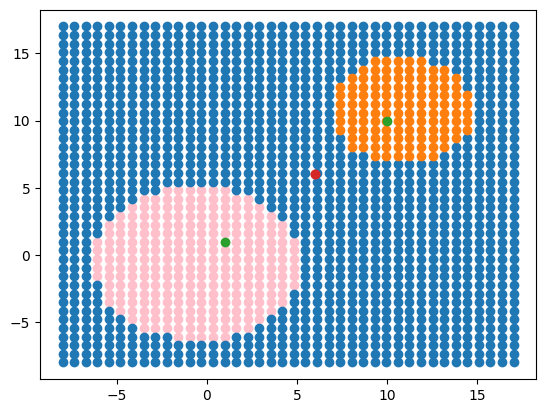

In [29]:
from numpy import *
from pylab import *

ep = 0.1

c1 = [1,1] # Prototype A
c2 = [6,6]
c3 = [10,10] # Prototype B

b3 = 0.4
#0.5593 correct value
#b3 = float(input("Enter value for b3: "))

def distA(x,y):
    return sqrt((c1[0]-x)**2+(c1[1]-y)**2)

def distB(x,y):
    return sqrt((c3[0]-x)**2+(c3[1]-y)**2)

D = distA(c3[0],c3[1]) # Distance between c1 and c3

d = distB(c2[0],c2[1]) # Distance between c2 and c3

# Distance between c1 and c2 is D-d

a1 = (2*d-D)/(3*d+D)-b3*((3*d-4*D)/(3*d+D))
a2 = d/(3*d+D)+b3*(D/(3*d+D))
a3 = 2*D/(3*d+D)-b3*((-3*d+5*D)/(3*d+D))
b1 = (2*d+D)/(3*d+D)-b3*(D/(3*d+D)+1)
b2 = d/(3*d+D)+b3*(D/(3*d+D))

print("d =",d)
print("D =",D)
print("D-d =",D-d)

print("\na1 =",a1)
print("a2 =",a2)
print("a3 =",a3)
print("b1 =",b1)
print("b2 =",b2)
print("b3 =",b3)

print("\nSum to unity check:")
print(a1+a2+a3)
print(b1+b2+b3)

F1 = a1/(0+ep)+b1/(D+ep)-a2/(0+ep)-b2/(D+ep)-ep**2
F2 = a1/(0+ep)+b1/(D+ep)-a3/(0+ep)-b3/(D+ep)-ep**2

G1 = a2/(D-d+ep)+b2/(d+ep)-a1/(D-d+ep)-b1/(d+ep)-ep**2
G2 = a2/(D-d+ep)+b2/(d+ep)-a3/(D-d+ep)-b3/(d+ep)-ep**2

H1 = a3/(D+ep)+b3/(0+ep)-a1/(D+ep)-b1/(0+ep)-ep**2
H2 = a3/(D+ep)+b3/(0+ep)-a2/(D+ep)-b2/(0+ep)-ep**2

Ax = [a1/(0+ep)+0+0+b1/(D+ep)+0+0,
     a1/(0+ep)-a2/(0+ep)+0+b1/(D+ep)-b2/(D+ep)+0,
     a1/(0+ep)-a2/(0+ep)-a3/(0+ep)+b1/(D+ep)-b2/(D+ep)-b3/(D+ep),
     0+a2/(D-d+ep)+0+0+b2/(d+ep)+0,
     -a1/(D-d+ep)+a2/(D-d+ep)+0-b1/(d+ep)+b2/(d+ep)+0,
     -a1/(D-d+ep)+a2/(D-d+ep)-a3/(D-d+ep)-b1/(d+ep)+b2/(d+ep)-b3/(d+ep),
     0+0+a3/(D+ep)+0+0+b3/(0+ep),
     -a1/(D+ep)+0+a3/(D+ep)-b1/(0+ep)+0+b3/(0+ep),
     -a1/(D+ep)-a2/(D+ep)+a3/(D+ep)-b1/(0+ep)-b2/(0+ep)+b3/(0+ep)]

s = set(Ax)
Ax_smallest = sorted(s)[0]
Ax_2smallest = sorted(s)[1]

obj = a1*(3/(0+ep)-2/(D-d+ep)-2/(D+ep))+a2*(-2/(0+ep)+3/(D-d+ep)-1/(D+ep))+a3*(-1/(0+ep)-1/(D-d+ep)+3/(D+ep))+b1*(3/(D+ep)-2/(d+ep)-2/(0+ep))+b2*(-2/(D+ep)+3/(d+ep)-1/(0+ep))+b3*(-1/(D+ep)-1/(d+ep)+3/(0+ep))
print("obj =",obj)

print("\nF1 =",F1)
print("F2 =",F2)

print("G1 =",G1)
print("G2 =",G2)

print("H1 =",H1)
print("H2 =",H2)

def lattice_plot(start,stop,num):
    xs = linspace(start,stop,num)
    ys = linspace(start,stop,num)

    c1_x = []
    c1_y = []
    c2_x = []
    c2_y = []
    c3_x = []
    c3_y = []

    for i in range(len(xs)):
        for j in range(len(ys)):
            Val1 = a1/(distA(xs[i],ys[j])+0.01) + b1/(distB(xs[i],ys[j])+0.01)
            Val2 = a2/(distA(xs[i],ys[j])+0.01) + b2/(distB(xs[i],ys[j])+0.01)
            Val3 = a3/(distA(xs[i],ys[j])+0.01) + b3/(distB(xs[i],ys[j])+0.01)
            if Val1 > Val2 and Val1 > Val3:
                c1_x.append(xs[i])
                c1_y.append(ys[j])
            elif Val2 > Val1 and Val2 > Val3:
                c2_x.append(xs[i])
                c2_y.append(ys[j])
            else:
                c3_x.append(xs[i])
                c3_y.append(ys[j])

    scatter(c1_x,c1_y,c ="pink")
    scatter(c2_x,c2_y)
    scatter(c3_x,c3_y)
    scatter([c1[0],c3[0]],[c1[1],c3[1]])
    scatter([c2[0],c2[0]],[c2[1],c2[1]])
    show()
    
lattice_plot(-8,17,40)

In [9]:
! pip install matplotlib